In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style
sns.set(style="whitegrid")

In [3]:
data = pd.read_csv("titanic.csv")

In [4]:
# Quick look at the data
print("First 5 rows:")
display(data.head())

print("\nDataset Info:")
data.info()

print("\nMissing Values:")
print(data.isnull().sum())

print("\nStatistical Summary:")
display(data.describe(include='all'))

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Emb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


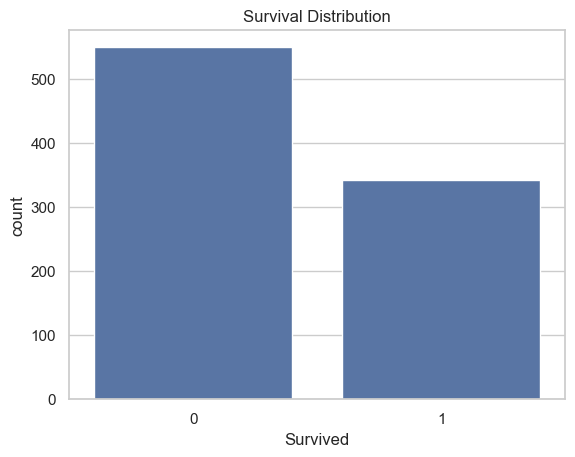

In [5]:
# Univariate Analysis

# Survival distribution
sns.countplot(x="Survived", data=data)
plt.title("Survival Distribution")
plt.show()

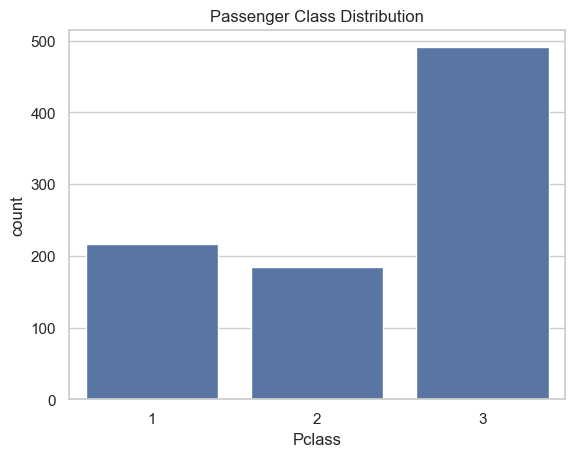

In [6]:
# Pclass distribution
sns.countplot(x="Pclass", data=data)
plt.title("Passenger Class Distribution")
plt.show()

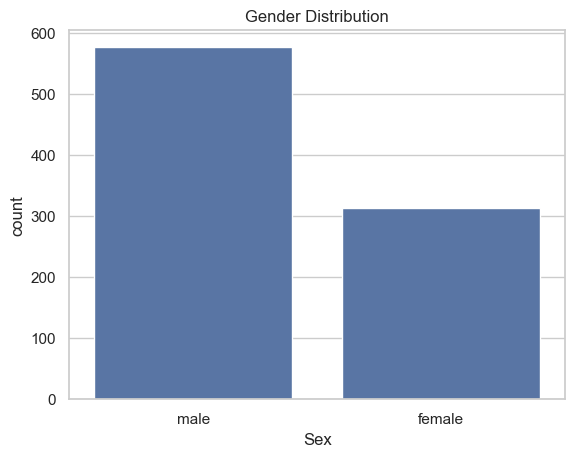

In [7]:

# Gender distribution
sns.countplot(x="Sex", data=data)
plt.title("Gender Distribution")
plt.show()

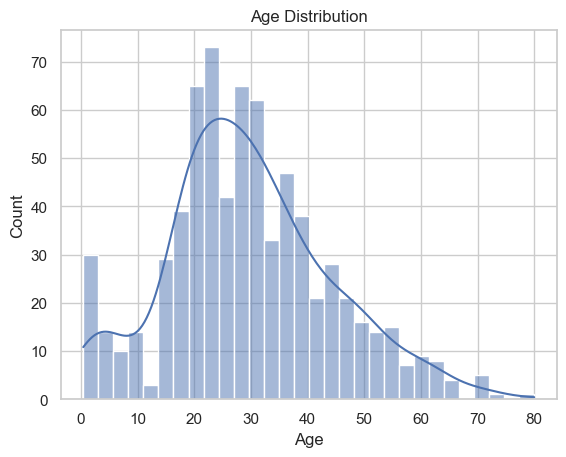

In [8]:
# Age distribution
sns.histplot(data["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

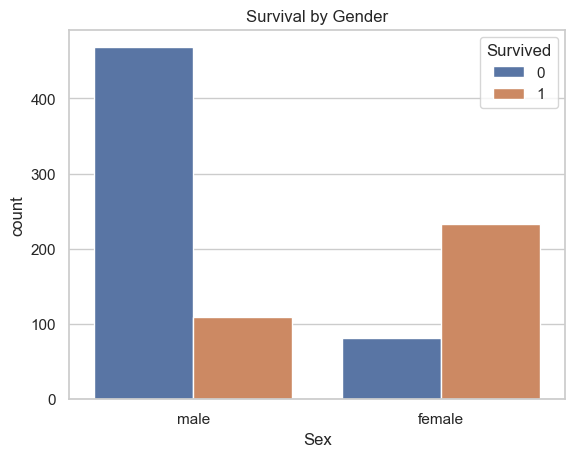

In [9]:
#Bivariate Analysis
# Survival by gender
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survival by Gender")
plt.show()

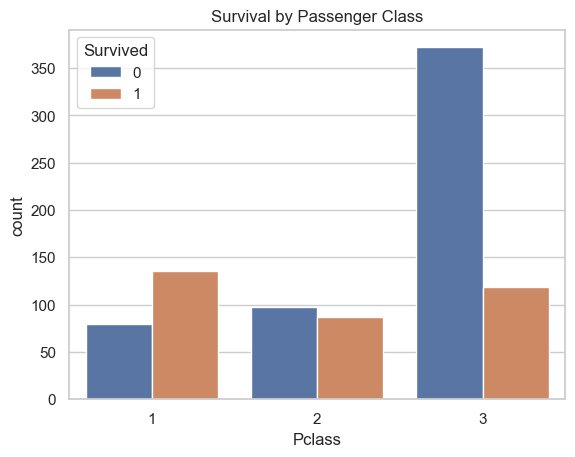

In [10]:

# Survival by class
sns.countplot(x="Pclass", hue="Survived", data=data)
plt.title("Survival by Passenger Class")
plt.show()

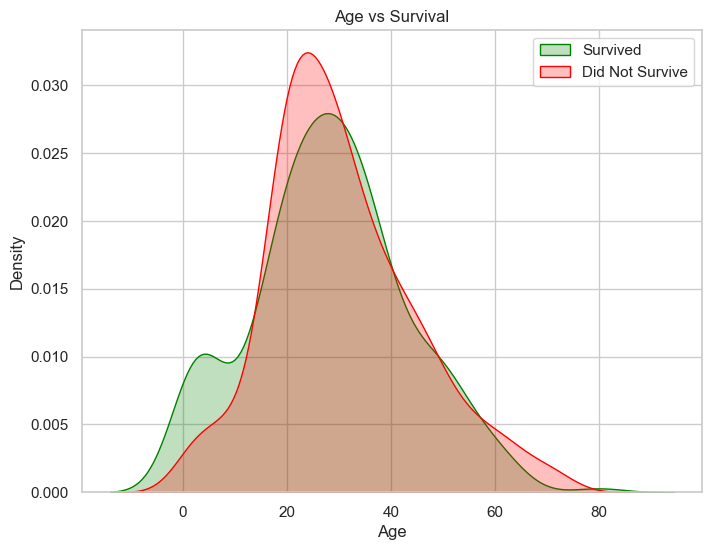

In [11]:
# Age vs Survival
plt.figure(figsize=(8,6))
sns.kdeplot(data=data[data["Survived"]==1]["Age"], fill=True, label="Survived", color="green")
sns.kdeplot(data=data[data["Survived"]==0]["Age"], fill=True, label="Did Not Survive", color="red")
plt.title("Age vs Survival")
plt.legend()
plt.show()

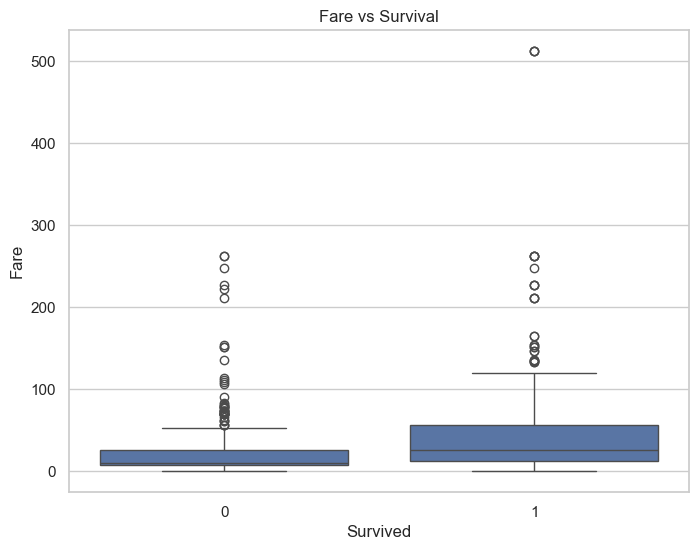

In [12]:
# Fare vs Survival
plt.figure(figsize=(8,6))
sns.boxplot(x="Survived", y="Fare", data=data)
plt.title("Fare vs Survival")
plt.show()

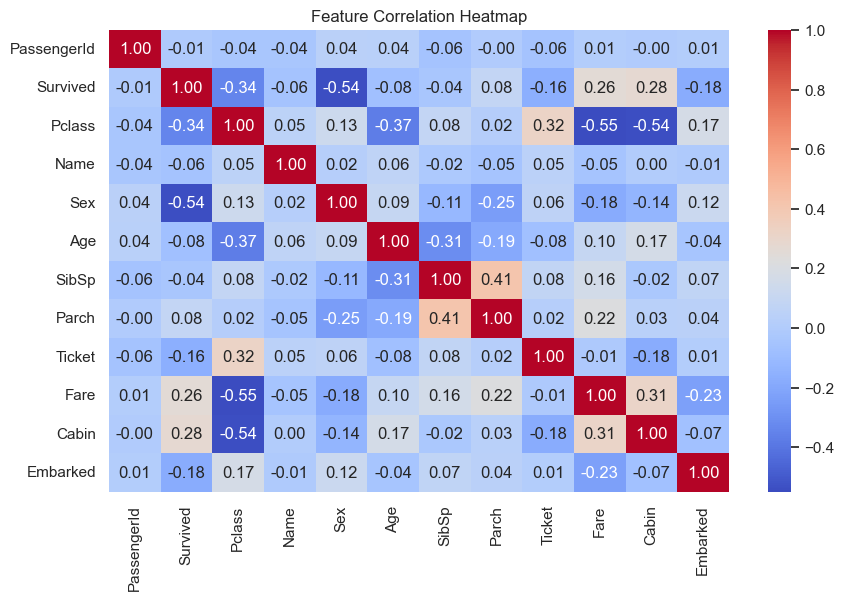

In [14]:
#Correlation Analysis

# Copy data to avoid modifying original
corr_data = data.copy()

# Automatically convert all categorical columns to numeric codes
for col in corr_data.select_dtypes(include='object').columns:
    corr_data[col] = corr_data[col].astype('category').cat.codes

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

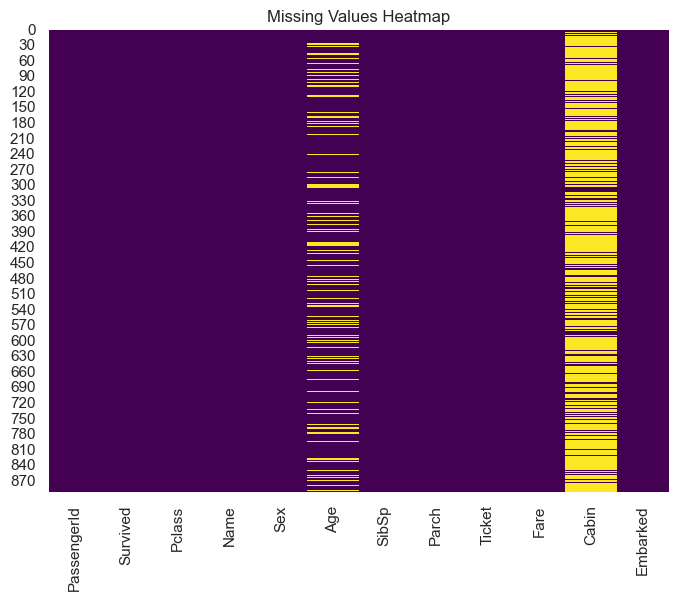

In [15]:
#Missing Value Patterns

plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()